# Gráficas en 3-D con Matplotlib

Matplotlib se diseñó inicialmente pensando en representaciones bidimensionales únicamente.

Llegada la versión 1.0, se empezaron a introducir pequeñas utilidades de trazado tridimensional sobre la representación bidimensional de Matplotlib, y el resultado nos permite hacernos una idea de la representación en 3 dimensiones (aunque sea algo limitado).

Los gráficos tridimensionales se habilitan importando el kit de herramientas `` mplot3d ``, incluido con la instalación principal de Matplotlib:

In [50]:
from mpl_toolkits import mplot3d

Una vez que se importa este submódulo, se pueden crear ejes tridimensionales pasando el parámetro `` proyección = '3d'`` a cualquiera de las rutinas normales de creación de ejes:

In [51]:
%matplotlib inline
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

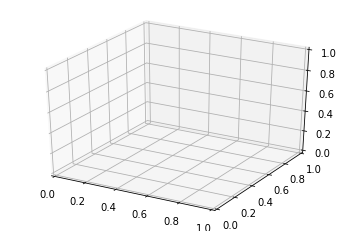

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Con los ejes tridimensionales habilitados, ya podremos representar gráficos tridimensionales.

El trazado tridimensional es una de las funcionalidades que se beneficia enormemente de ver las figuras de forma interactiva en lugar de estáticamente como estamos haciendo en estos notebooks. Sin embargo, para ello habría que realizar un proceso de instalación algo complejo y utilizar la sentencia ``% matplotlib widget `` en lugar de ``% matplotlib inline `` al ejecutar este código.

Si quieres hacer pruebas, te dejo el siguiente repositorio con la [guía de instalación](https://github.com/matplotlib/ipympl) para usar ``%matplotlib widget``

En resumen, podrías configurarlo ejecutando los siguientes comandos en el terminal de Anaconda:
```
conda install -c conda-forge ipympl
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter lab build

```

Después tendremos que reiniciarlo todo (cerrando y abriendo Anaconda de nuevo), y ya podremos ejecutarlo.

## Puntos y líneas tridimensionales

El gráfico tridimensional más básico es un gráfico de línea o uno de dispersión, creados en los ejes (x, y, z).

Análogamente a los gráficos bidimensionales más comunes que hemos visto anteriormente, estos se pueden crear usando las funciones `` ax.plot3D `` y `` ax.scatter3D ``.
La forma de llamarles es prácticamente idéntica a la de sus contrapartes bidimensionales, por lo que podremos basarnos en los ntebooks vistos para obtener más información sobre cómo controlar la salida.

A continuación, dibujaremos una espiral trigonométrica, junto con algunos puntos dibujados al azar cerca de la línea:

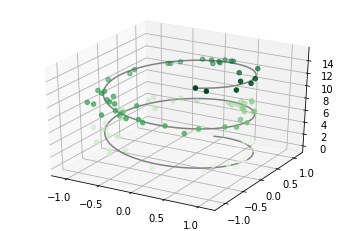

In [53]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Fíjate que, por defecto, los puntos de dispersión tienen su transparencia ajustada para dar una sensación de profundidad en la visualización.
Si bien el efecto tridimensional a veces es difícil de ver dentro de una imagen estática, una vista interactiva puede llevar a una buena intuición sobre las características de los puntos.

## Diagramas de contorno tridimensionales

De manera análoga a las gráficas de contorno que que hemos visto, ``mplot3d`` contiene herramientas para crear gráficas de relieve tridimensionales utilizando las mismas entradas.

Al igual que los gráficos bidimensionales `` ax.contour``, `` ax.contour3D `` requiere que todos los datos de entrada estén en forma de cuadrículas regulares bidimensionales, con los datos Z evaluados en cada punto.
A continuación, mostraremos un diagrama de contorno con relieve de una función senoidal tridimensional:

In [54]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

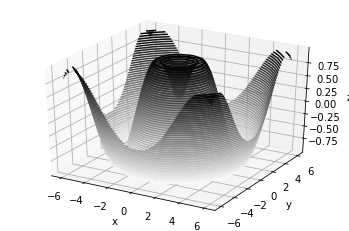

In [55]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

A veces, el ángulo de visión predeterminado no es el óptimo, en cuyo caso podemos usar el método `` view_init `` para establecer los ángulos de elevación y azimutal. En el siguiente ejemplo, usaremos una elevación de 60 grados (es decir, 60 grados por encima del plano x-y) y un acimut de 35 grados (es decir, girado 35 grados en sentido antihorario sobre el eje z):

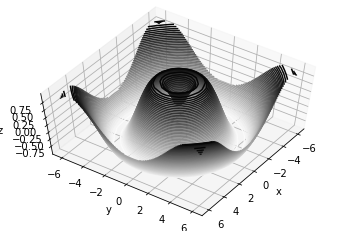

In [56]:
ax.view_init(60, 35)
fig

Para que entendamos mejor cómo interpretar estos valores, te dejo una sucesión de gráficas con varias combinaciones:

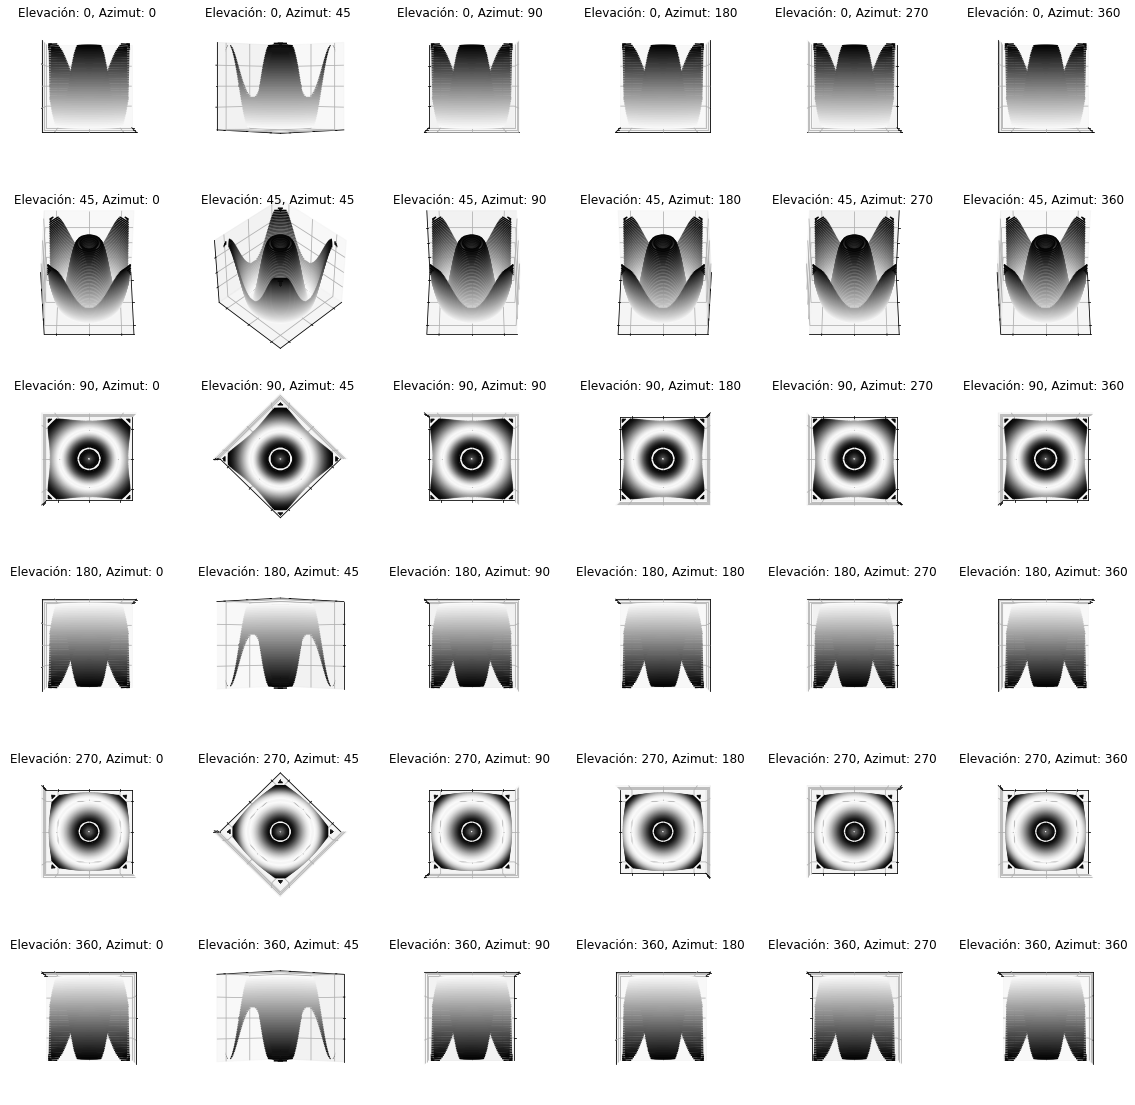

In [57]:
fig = plt.figure(figsize=(20, 20))

elevacion = [0, 45, 90, 180, 270, 360]
azimut = [0, 45, 90, 180, 270, 360]

for i in range(0, len(elevacion)):
    for j in range(0, len(azimut)):
        ax = fig.add_subplot(6, 6, i*6+(j+1), projection='3d')
        ax.contour3D(X, Y, Z, 50, cmap='binary')
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_formatter(plt.NullFormatter())
        ax.zaxis.set_major_formatter(plt.NullFormatter())
        ax.view_init(elevacion[i], azimut[j])
        ax.set_title(f"Elevación: {elevacion[i]}, Azimut: {azimut[j]}")
    

Si hubiéramos activado la opción para la visión interactiva, no sería necesario explicar esto, ya que podríamos hacerlo moviéndolo con el ratón.

## Gráficos de malla y superficie

Otros dos tipos de gráficas tridimensionales que funcionan con datos cuadriculados son las gráficas de mallado y las gráficas de superficie.
Estas toman una cuadrícula de valores y la proyectan sobre la superficie tridimensional especificada, generando una serie de figuras tridimensioneales bastante fáciles de visualizar.

A continuación, se muestra un ejemplo del uso de una gráfica de mallas:

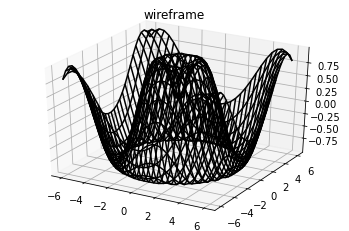

In [58]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

Un diagrama de superficie es al diagrama de malla, lo que el ``contourf`` era al ``contour``, es decir, se basa en él pero lo rellena realizando un degradado o cambio decolor en función de sus variaciones.

Convertir una estructura de malla en una de superficie puede ayudar a la percepción de la topología de la superficie que se visualiza:

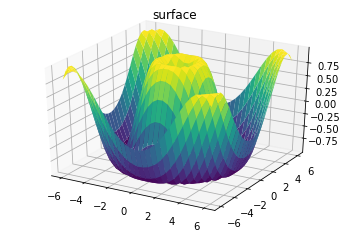

In [75]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Pero también podríamos hacerlo basándonos en coordenadas polares o cilíndricas, no solo cartesianas:

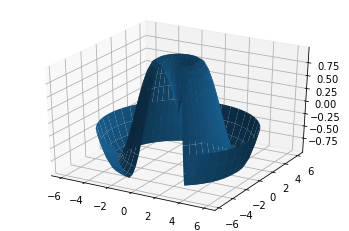

In [88]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1)

## Ejercicio

1. Lee el dataframe "line_3d_dataset.csv" y limpia los nulos
2. Representa con un gráfico 3D las 3 dimensiones que posee el dataframe leído. El color de la representación deberá ser rojo
3. Haz lo propio pero solo con los puntos. Ahora, utiliza el color para hacer hincapié en el valor del mismo, utilizando un cmap divergente, como RdBu
3. Representa de forma tridimensional 

In [144]:
import pandas as pd

df = pd.read_csv("line_3d_dataset.csv")
# df['edad_mes'] = df['dob'].apply(lambda x: (11-int(x[5:7])) + (2020-int(x[:4]))*12)
df = df.dropna(subset=['x', 'y', 'z'])
x = df['x']
y = df['y']
z = df['z']

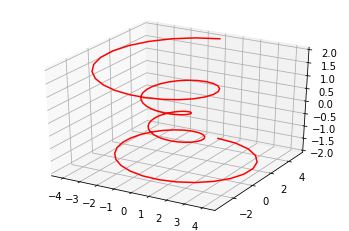

In [152]:
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, color='red')

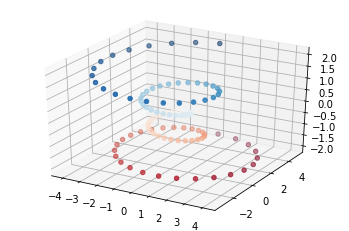

In [159]:
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='RdBu')

## Ejercicio

1. Lee el dataframe "line_3d_dataset.csv", limpia los nulos y quédate con aquellos que tengan un 'overall' > 80
2. Crea una nueva columna "edad_mes" en la que calcules los meses de cada jugador como: $edad\_mes = (11 - mes\_dob) + (2020 - año\_dob)*12$
3. Representa de forma tridimensional la variable "quedarse_equipo", sabiendo que viene determinado por las variables "overall" y "edad_mes" como:

$\frac{\sqrt{overall} ^\frac{edad\_mes}{300}*\sqrt{edad\_mes} ^\frac{overall}{100}}{1000}$
Siendo "overall" y "edad_mes" las 2 dimensio

In [185]:
df = pd.read_csv("FIFA20.csv")
df = df[df['overall']>80]
df['edad_mes'] = df['dob'].apply(lambda x: (11-int(x[5:7])) + (2020-int(x[:4]))*12)
df.iloc[:2]

,short_name,long_name,dob,club,overall,potential,value_eur,wage_eur,team_position,preferred_foot,influencer,edad_mes
0,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,FC Barcelona,94,94,95500000,565000,RW,Left,True,401
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Juventus,93,93,58500000,405000,LW,Right,True,429


In [206]:
def quedarse_equipo(x, y):
    return (np.sqrt(x)**(y/300))*(np.sqrt(y)**(x/100))/1000

x = df['overall']
y = df['edad_mes']

X, Y = np.meshgrid(x, y)

Z = quedarse_equipo(X, Y)

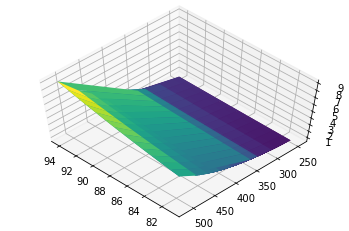

In [207]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(60, 135)